<a href="https://colab.research.google.com/github/Noahbisht0/Deep-Learning/blob/main/AdamOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]
shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288,)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1,)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]
v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [

IndexError: ignored

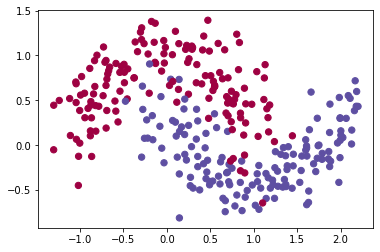

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *
def update_parameters_with_gd(parameters,grads,learning_rate):
  L = len(parameters)//2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
  return parameters 
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))  
def random_mini_batches(X,Y,mini_batch_size = 64,seed = 0):
  np.random.seed(seed)
  m = X.shape[1]
  mini_batches = []
  permutation = list(np.random.permutation(m))
  shuffled_X = X[:,permutation]
  shuffled_Y = Y[:,permutation].reshape((1,m))
  num_complete_minibatches = math.floor(m/mini_batch_size)
  for k in range(0,num_complete_minibatches):
    mini_batch_X = shuffled_X[:,k * mini_batch_size:(k+1)*mini_batch_size]
    mini_batch_Y = shuffled_Y[:,k * mini_batch_size: (k+1)*mini_batch_size]
    mini_batch = (mini_batch_X,mini_batch_Y)
    mini_batches.append(mini_batch)
  if m % mini_batch_size != 0:
    mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size]
    mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size]
    mini_batch = (mini_batch_X,mini_batch_Y)
    mini_batches.append(mini_batch)
  return mini_batches  
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))  
def initialize_velocity(parameters):
  L = len(parameters)//2
  v = {}
  for l in range(L):
    v["dW"+ str(l+1)] = np.zeros_like(parameters["W" +str(l+1)])
    v["db"+ str(l+1)] = np.zeros_like(parameters["b" +str(l+1)])
  return v
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
def update_parameters_with_momentum(parameters,grads,v,beta,learning_rate,):
  L = len(parameters)//2
  for l in range(L):
    v["dW" + str(l+1)] = beta * v["dW" +str(l+1)] + (1 - beta) * grads["dW" +str(l+1)]
    v["db" + str(l+1)] = beta * v["db" +str(l+1)] + (1 - beta) * grads["db" +str(l+1)]
    parameters["W" +str(l+1)] = parameters["W" +str(l+1)] - learning_rate * v["dW" +str(l+1)]
    parameters["b" +str(l+1)] = parameters["b" +str(l+1)] - learning_rate * v["db" +str(l+1)]
  return parameters,v

parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))  
def initialize_adam(parameters):
  L = len(parameters)//2
  v = {}
  s = {}
  for l in range(L):
        v["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
  return v,s
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))    
def update_parameters_with_adam(parameters,grads,v,s,t,beta1 = 0.9,beta2 = 0.999,learning_rate=0.01,epsilon = 1e-8):
  L = len(parameters)//2
  v_corrected = {}
  s_corrected = {}
  for l in range(L):
    v["dW" + str(l+1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
    v["db" + str(l+1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
    v_corrected["dW" + str(l+1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
    v_corrected["db" + str(l+1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))
    s["dW" + str(l+1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
    s["db" + str(l+1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
    s_corrected["dW" + str(l+1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
    s_corrected["db" + str(l+1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))
    parameters["W" + str(l+1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / (np.sqrt(s_corrected["dW" + str(l + 1)]) + epsilon)
    parameters["b" + str(l+1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / (np.sqrt(s_corrected["db" + str(l + 1)]) + epsilon)                    
  return parameters,s,v






parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))    

train_X,train_Y = load_dataset()

def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
  L = len(layers_dims)             
  costs = []                       
  t = 0                            
  seed = 10                        
    
    
  parameters = initialize_parameters(layers_dims)

    
  if optimizer == "gd":
      pass 
  elif optimizer == "momentum":
      v = initialize_velocity(parameters)
  elif optimizer == "adam":
      v, s = initialize_adam(parameters)
    
    
  for i in range(num_epochs):
        
        
      seed = seed + 1
      minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

      for minibatch in minibatches:

            
          (minibatch_X, minibatch_Y) = minibatch

          
          a3, caches = forward_propagation(minibatch_X, parameters)

            
          cost = compute_cost(a3, minibatch_Y)

            
          grads = backward_propagation(minibatch_X, minibatch_Y, caches)

          
          if optimizer == "gd":
              parameters = update_parameters_with_gd(parameters, grads, learning_rate)
          elif optimizer == "momentum":
              parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
          elif optimizer == "adam":
              t = t + 1 
              parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        
      if print_cost and i % 1000 == 0:
          print ("Cost after epoch %i: %f" %(i, cost))
      if print_cost and i % 100 == 0:
          costs.append(cost)
                
    
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('epochs (per 100)')
  plt.title("Learning rate = " + str(learning_rate))
  plt.show()

  return parameters     


layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

